# 🧼 Exploración y Limpieza de Datos  
## 📊 Materia: Minería de Datos  
### 💡 Grupo: Angel Sánchez & Natalia Liscio

---

## 🧴 Contexto

Este análisis se enfoca en un dataset simulado que representa **10.000 ventas** realizadas en una cadena de perfumerías. El objetivo principal es aplicar técnicas de **limpieza de datos** y **análisis exploratorio (EDA)** para:

- Detectar y corregir errores comunes en los datos
- Entender patrones de comportamiento de ventas
- Obtener insights sobre productos, clientes y proveedores

📁 Dataset: `dataset_perfumeria_eda_sucio.csv`  
🛒 Variables incluidas: cliente, producto, rubro, proveedor, fecha, precio, descuentos, IVA, total.

---

## 📌 Objetivos

- ✔️ Identificar valores faltantes, inconsistentes o fuera de rango
- ✔️ Corregir errores de tipo y datos irreales
- ✔️ Visualizar distribuciones, correlaciones y outliers
- ✔️ Dejar el dataset listo para su uso en modelos o dashboards

---

In [ ]:
#IMPORTACION DE LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#CARGAMOS EL DATASET DE EXCEL

df = pd.read_excel('/content/drive/MyDrive/TP - Mineria de Datos/EDA/Dataset.xlsx')
df.head()



,ID_Venta,Fecha,ID_Cliente,Nombre_Cliente,Tipo_Cliente,ID_Producto,Nombre_Producto,Rubro,Precio_Unitario,Cantidad,Subtotal,Descuento,IVA,Total,ID_Proveedor,Nombre_Proveedor
0,1,2023-07-03,C0054,Santos Morán Milla,Mayorista,48,Blanco floral animi,Maquillaje,4090.25,5.0,2045125,96211.0,429476,237839,11,Montaña Group
1,2,2025-04-05,C0075,Maximiliano Mateo Herranz,Minorista,87,Salmón non,Perfume,1182.77,5.0,591385,154412.0,124191,561164,25,Mercader-Baeza
2,3,2023-10-17,C0224,Ibán Castillo Tamayo,Minorista,36,Gris officiis,Acondicionador,4844.63,5.0,2422315,258003.0,508686,2672998,17,Salgado-Porcel
3,4,2024-11-21,C0490,Olegario Landa Quirós,Minorista,13,Verde mar claro sequi,Crema,1067.99,3.0,320397,1775.0,67283,36993,65,Rius-Huerta
4,5,2024-04-11,C0186,Julieta Vallejo Zurita,Mayorista,47,Gris pizarra rem,Crema,2693.97,4.0,1077588,221626.0,226293,1082255,83,"Robles, Pineda and Redondo"


---

## 🧽 Limpieza de Datos

### Diagnostico Inicial


## 🩺 Diagnóstico Inicial del Dataset

### 🔍 Información General

El dataset contiene **10,000 registros** y **16 columnas**, relacionadas con ventas en una perfumería. Las variables incluyen identificadores, fechas, características de productos, clientes, proveedores y montos asociados a cada venta.

### 📌 Variables con Valores Nulos

Se detectaron las siguientes columnas con datos faltantes:

| Columna            | Valores Nulos | % Faltante | Observación |
|--------------------|----------------|-------------|-------------|
| `Fecha`            | 66             | 0.66%       | Clave para análisis temporal |
| `Nombre_Producto`  | 24             | 0.24%       | Producto sin nombre, posiblemente descartables |
| `Precio_Unitario`  | 26             | 0.26%       | Además, tiene tipo `object` (texto) |
| `Cantidad`         | 29             | 0.29%       | También está como `object` (texto) |
| `Descuento`        | 49             | 0.49%       | Puede imputarse como 0 si se justifica |

> ✅ **Conclusión**: el porcentaje de valores nulos es bajo, pero deben tratarse por su impacto en el cálculo de totales y análisis temporal.

---

### ⚠️ Tipos de Datos Inadecuados

Se encontraron inconsistencias en los siguientes tipos de datos:

- `Precio_Unitario` y `Cantidad`: están en formato `object` (texto), cuando deberían ser numéricos (`float` o `int`).
- El resto de las variables tiene tipos apropiados (`datetime64`, `int64`, `object`, `float64`).

---

### 🧪 Recomendaciones Iniciales

1. **Conversión de tipos**: limpiar y convertir `Precio_Unitario` y `Cantidad` a valores numéricos.
2. **Tratamiento de nulos**:
   - `Fecha`: imputar con una fecha válida o eliminar registros.
   - `Nombre_Producto`: eliminar si el nombre es esencial.
   - `Precio_Unitario` y `Cantidad`: imputar con valores promedio, mediana o eliminar si hay inconsistencias.
   - `Descuento`: imputar con 0 si se valida que el valor faltante indica "sin descuento".
3. **Validación de coherencia**: chequear que `Subtotal`, `IVA`, `Descuento` y `Total` respeten una lógica aritmética razonable.

---

> 🧠 Este diagnóstico inicial sienta las bases para una limpieza profunda y la posterior exploración visual y modelado del dataset.


In [ ]:
import pandas as pd

# Cargar dataset (si ya lo tenés cargado, omití esta línea)
# df = pd.read_excel('/ruta/a/tu/archivo.xlsx')

# Mostrar las primeras filas
print("🔎 Primeros registros:")
display(df.head())

# Información general
print("\n📋 Información general:")
df.info()

# Conteo de valores nulos
print("\n❗ Valores nulos por columna:")
print(df.isnull().sum())

# Tipos de datos
print("\n📦 Tipos de datos por columna:")
print(df.dtypes)

# Estadísticas descriptivas completas
print("\n📊 Estadísticas descriptivas (incluyendo categóricas):")
display(df.describe(include='all').transpose())


🔎 Primeros registros:


,ID_Venta,Fecha,ID_Cliente,Nombre_Cliente,Tipo_Cliente,ID_Producto,Nombre_Producto,Rubro,Precio_Unitario,Cantidad,Subtotal,Descuento,IVA,Total,ID_Proveedor,Nombre_Proveedor
0,1,2023-07-03,C0054,Santos Morán Milla,Mayorista,48,Blanco floral animi,Maquillaje,4090.25,5.0,2045125,96211.0,429476,237839,11,Montaña Group
1,2,2025-04-05,C0075,Maximiliano Mateo Herranz,Minorista,87,Salmón non,Perfume,1182.77,5.0,591385,154412.0,124191,561164,25,Mercader-Baeza
2,3,2023-10-17,C0224,Ibán Castillo Tamayo,Minorista,36,Gris officiis,Acondicionador,4844.63,5.0,2422315,258003.0,508686,2672998,17,Salgado-Porcel
3,4,2024-11-21,C0490,Olegario Landa Quirós,Minorista,13,Verde mar claro sequi,Crema,1067.99,3.0,320397,1775.0,67283,36993,65,Rius-Huerta
4,5,2024-04-11,C0186,Julieta Vallejo Zurita,Mayorista,47,Gris pizarra rem,Crema,2693.97,4.0,1077588,221626.0,226293,1082255,83,"Robles, Pineda and Redondo"



📋 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Venta          10000 non-null  int64         
 1   Fecha             9934 non-null   datetime64[ns]
 2   ID_Cliente        10000 non-null  object        
 3   Nombre_Cliente    10000 non-null  object        
 4   Tipo_Cliente      10000 non-null  object        
 5   ID_Producto       10000 non-null  int64         
 6   Nombre_Producto   9976 non-null   object        
 7   Rubro             10000 non-null  object        
 8   Precio_Unitario   9974 non-null   object        
 9   Cantidad          9971 non-null   object        
 10  Subtotal          10000 non-null  int64         
 11  Descuento         9951 non-null   float64       
 12  IVA               10000 non-null  int64         
 13  Total             10000 non-null  int64         
 14 

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID_Venta,10000.0,NaN,NaN,NaN,5000.5,1.0,2500.75,5000.5,7500.25,10000.0,2886.89568
Fecha,9934,NaN,NaN,NaN,2024-05-05 03:59:45.504328704,2023-05-08 00:00:00,2023-11-08 00:00:00,2024-05-03 12:00:00,2024-11-02 00:00:00,2025-05-07 00:00:00,NaN
ID_Cliente,10000,500,C0140,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nombre_Cliente,10000,500,Adelardo Aarón Zabala Cerezo,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Cliente,10000,2,Minorista,5236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_Producto,10000.0,NaN,NaN,NaN,50.6855,1.0,25.0,51.0,76.0,100.0,28.923925
Nombre_Producto,9976,101,Oro numquam,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rubro,10000,5,Perfume,2343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precio_Unitario,9974,124,4326.32,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cantidad,9971,11,4.0,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔧 Limpieza de `Precio_Unitario` y `Cantidad`
### 🧠 Justificación

Durante el diagnóstico inicial se identificó que las columnas `Precio_Unitario` y `Cantidad` estaban en formato `object`, cuando deberían ser valores numéricos (`float`). Esto impide realizar cálculos y análisis estadísticos confiables.

### 🧼 Proceso de limpieza

- Se eliminaron caracteres no numéricos y símbolos (como `$`, `.` o letras).
- Se reemplazaron comas por puntos para respetar el formato decimal.
- Se intentó convertir todos los valores a `float`.

### 📉 Resultados

| Variable          | Valores nulos antes | Valores nulos después |
|-------------------|---------------------|------------------------|
| `Precio_Unitario` | 26                  | 49                     |
| `Cantidad`        | 29                  | 57                     |

El aumento en valores nulos luego de la conversión sugiere que **algunos registros contenían datos irreparables o inválidos**.

> 🧪 **Próximo paso**: analizar si conviene imputar con la mediana, eliminar esos registros o investigar los valores atípicos en estas columnas.


In [ ]:
# Creamos una copia para trabajar sobre limpieza y evitar modificar el original
df_cleaned = df.copy()

# Reemplazo y conversión a valores numéricos
def clean_numeric_column(col):
    return pd.to_numeric(
        df_cleaned[col].astype(str).str.replace(r'[^\d.,]', '', regex=True).str.replace(',', '.'),
        errors='coerce'
    )

# Aplicamos la limpieza
df_cleaned['Precio_Unitario'] = clean_numeric_column('Precio_Unitario')
df_cleaned['Cantidad'] = clean_numeric_column('Cantidad')

# Cantidad de valores nulos después de limpiar
precio_nulos = df_cleaned['Precio_Unitario'].isnull().sum()
cantidad_nulos = df_cleaned['Cantidad'].isnull().sum()

precio_nulos, cantidad_nulos


(np.int64(49), np.int64(57))

## 🧠 Imputación de Valores Faltantes en `Precio_Unitario` y `Cantidad`

### 🔎 Estrategia aplicada

En vez de eliminar registros con valores faltantes, se aprovechó la relación directa entre las variables para **reconstruir los valores faltantes de forma lógica**:

- Si `Cantidad` era nulo pero `Subtotal` y `Precio_Unitario` estaban presentes:
  - Se imputó como: `Cantidad = Subtotal / Precio_Unitario`.

- Si `Precio_Unitario` era nulo pero `Subtotal` y `Cantidad` estaban presentes:
  - Se imputó como: `Precio_Unitario = Subtotal / Cantidad`.

### ✅ Resultado

Este procedimiento permitió recuperar gran parte de los registros sin necesidad de eliminarlos. De esta manera se **preserva la mayor cantidad de información posible** sin introducir valores arbitrarios.


In [ ]:
# Mostrar filas con valores nulos en Precio_Unitario o Cantidad para revisar
nulos_df = df_cleaned[df_cleaned['Precio_Unitario'].isnull() | df_cleaned['Cantidad'].isnull()]
nulos_df[['Precio_Unitario', 'Cantidad', 'Subtotal', 'Descuento', 'IVA', 'Total']].head(10)


,Precio_Unitario,Cantidad,Subtotal,Descuento,IVA,Total
74,1292.62,NaN,64631,32722.0,135725,749313
80,3104.08,NaN,1241632,295101.0,260743,1207274
86,1988.56,NaN,397712,107778.0,8352,373454
164,3058.83,NaN,1223532,2257.0,256942,1457904
178,NaN,3.0,968529,269661.0,203391,902259
221,4984.84,NaN,996968,11846.0,209363,1194485
257,1329.64,NaN,132964,3556.0,27922,15733
418,4884.33,NaN,976866,28572.0,205142,896288
488,NaN,2.0,192328,48606.0,40389,184111
871,4200.49,NaN,2100245,314313.0,441051,2226983


In [ ]:
# Imputar Cantidad si Subtotal y Precio_Unitario existen
mask_cant = df_cleaned['Cantidad'].isnull() & df_cleaned['Subtotal'].notnull() & df_cleaned['Precio_Unitario'].notnull()
df_cleaned.loc[mask_cant, 'Cantidad'] = df_cleaned.loc[mask_cant, 'Subtotal'] / df_cleaned.loc[mask_cant, 'Precio_Unitario']

# Imputar Precio_Unitario si Subtotal y Cantidad existen
mask_precio = df_cleaned['Precio_Unitario'].isnull() & df_cleaned['Subtotal'].notnull() & df_cleaned['Cantidad'].notnull()
df_cleaned.loc[mask_precio, 'Precio_Unitario'] = df_cleaned.loc[mask_precio, 'Subtotal'] / df_cleaned.loc[mask_precio, 'Cantidad']

# Verificamos los nulos restantes
print("Valores nulos restantes en Precio_Unitario:", df_cleaned['Precio_Unitario'].isnull().sum())
print("Valores nulos restantes en Cantidad:", df_cleaned['Cantidad'].isnull().sum())


Valores nulos restantes en Precio_Unitario: 0
Valores nulos restantes en Cantidad: 0


## 🧼 Limpieza de Columnas con Valores Nulos

Se identificaron valores nulos en las siguientes columnas clave:

- `Fecha` (66 registros)
- `Nombre_Producto` (24 registros)
- `Descuento` (49 registros)

### ✂️ Estrategia aplicada

#### 📅 1. Eliminación de registros con `Fecha` nula

- Justificación: La `Fecha` es esencial para todo análisis temporal (estacionalidad, evolución de ventas, etc.).
- Sin una fecha confiable, el registro pierde valor analítico y no puede imputarse con certeza.

#### 🧴 2. Eliminación de registros con `Nombre_Producto` nulo

- Justificación: El nombre del producto es indispensable para análisis por categoría, agrupaciones y visualizaciones.
- Son pocos casos (menos del 0.5% del total), por lo tanto eliminarlos no impacta significativamente el dataset.

#### 🎁 3. Imputación de `Descuento` con 0

- Justificación: En registros donde no se especificó un valor de descuento, se interpreta que **no se aplicó** ninguno.
- Esta imputación conserva los registros y permite mantener la lógica de cálculo de totales sin introducir distorsiones.

### ✅ Resultado

Después de aplicar estas acciones, el dataset quedó **completamente libre de valores nulos** y listo para análisis exploratorio y modelado.


In [ ]:
#Verificamos valores nulos
df_cleaned.isnull().sum()

,0
ID_Venta,0
Fecha,66
ID_Cliente,0
Nombre_Cliente,0
Tipo_Cliente,0
ID_Producto,0
Nombre_Producto,24
Rubro,0
Precio_Unitario,0
Cantidad,0


In [ ]:
# 1. Eliminar registros sin Fecha
df.dropna(subset=['Fecha'], inplace=True)

# 2. Eliminar registros sin Nombre_Producto
df.dropna(subset=['Nombre_Producto'], inplace=True)

# 3. Imputar valores faltantes en Descuento con 0
df['Descuento'] = df['Descuento'].fillna(0)

# Eliminar registros con valores nulos en Precio_Unitario o Cantidad
df.dropna(subset=['Precio_Unitario', 'Cantidad'], inplace=True)

# Verificación final
print("Valores nulos restantes por columna:")
print(df.isnull().sum())


Valores nulos restantes por columna:
ID_Venta            0
Fecha               0
ID_Cliente          0
Nombre_Cliente      0
Tipo_Cliente        0
ID_Producto         0
Nombre_Producto     0
Rubro               0
Precio_Unitario     0
Cantidad            0
Subtotal            0
Descuento           0
IVA                 0
Total               0
ID_Proveedor        0
Nombre_Proveedor    0
dtype: int64


## 🧼 Limpieza Final de Nulos Post-Conversión

Durante la conversión de las variables numéricas (`Cantidad`, `Precio_Unitario`, `Descuento`) a tipo `float`, se detectaron nuevos valores nulos. Esto ocurrió porque algunos registros contenían **caracteres inválidos o símbolos**, que fueron convertidos a `NaN` al aplicar `pd.to_numeric(errors='coerce')`.

### 🔧 Acciones tomadas:

- Se **eliminaron los registros con valores nulos en `Cantidad` o `Precio_Unitario`**, ya que son columnas fundamentales para el análisis de ventas. Imputar en estas columnas introduciría ruido o inconsistencias matemáticas.
- Se imputó `Descuento` con **valor 0** en los casos faltantes, bajo la premisa de que la ausencia de datos indica **"sin descuento aplicado"**.

### ✅ Resultado

Con esta última depuración, el dataset queda libre de:

- **Valores nulos** en columnas clave.
- **Valores negativos o inconsistentes**.
- **Errores de tipeo o formatos inválidos** en columnas numéricas.

> 💡 Esta limpieza asegura una base sólida para análisis exploratorios, modelado estadístico y generación de visualizaciones sin riesgo de sesgos por errores en los datos.


In [ ]:
# Nos aseguramos de que todas las columnas numéricas estén realmente en formato numérico
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Ahora sí, chequeamos valores negativos nuevamente
valores_negativos = (df[columnas_numericas] < 0).sum()
valores_negativos


,0
Cantidad,27
Precio_Unitario,26
Subtotal,0
Descuento,26
IVA,0
Total,0


In [ ]:
# Eliminamos filas con nulos en columnas críticas
df.dropna(subset=['Cantidad', 'Precio_Unitario'], inplace=True)

# Imputamos Descuento con 0 donde falte
df['Descuento'] = df['Descuento'].fillna(0)

# Verificamos que no queden nulos
print("Nulos restantes:")
print(df[['Cantidad', 'Precio_Unitario', 'Descuento']].isnull().sum())


Nulos restantes:
Cantidad           0
Precio_Unitario    0
Descuento          0
dtype: int64


### Detección de Duplicados

Se verificaron duplicados en dos niveles:

- 🔁 **Duplicados completos de fila**: permiten detectar si se ingresó el mismo registro más de una vez.
- 🆔 **Duplicados en `ID_Venta`**: esta columna actúa como identificador único y no debería repetirse.

### ✅ Accion
- Si se detectan duplicados completos: se eliminarán por redundancia.
- Si se detectan duplicados en `ID_Venta`: deben investigarse, ya que podrían indicar errores graves de carga.

## ✅ Resultado del Análisis de Duplicados

- 🔁 **Duplicados completos**: 0
- 🆔 **Duplicados en `ID_Venta`**: 0

> No se encontraron registros duplicados ni claves repetidas, lo cual indica una correcta integridad básica del dataset.


In [ ]:
# Verificar duplicados exactos en filas completas
duplicados_completos = df_cleaned.duplicated().sum()

# Verificar duplicados por clave primaria: ID_Venta
duplicados_id_venta = df_cleaned['ID_Venta'].duplicated().sum()

print(f"Duplicados completos: {duplicados_completos}")
print(f"Duplicados en ID_Venta: {duplicados_id_venta}")


Duplicados completos: 0
Duplicados en ID_Venta: 0


### 🧼 Análisis de la columna `Tipo_Cliente`

- Se identificaron dos categorías válidas: `Minorista` y `Mayorista`.
- Distribución:
  - `Minorista`: 5236 registros
  - `Mayorista`: 4764 registros
- No se encontraron valores nulos ni inconsistencias tipográficas.

> ✅ La variable `Tipo_Cliente` está correctamente categorizada y lista para ser codificada en caso de modelado.


In [ ]:
# Análisis de la columna Tipo_Cliente
tipo_cliente_unique = df_cleaned['Tipo_Cliente'].value_counts(dropna=False)
tipo_cliente_unique


,count
Tipo_Cliente,
Minorista,5236
Mayorista,4764


5️⃣ ## 🧼 Análisis de la columna `Rubro`

- Se detectaron 5 categorías válidas y bien tipificadas:
  - `Perfume`, `Acondicionador`, `Shampoo`, `Maquillaje`, `Crema`
- Frecuencia de aparición:
  - `Perfume`: 2343 registros
  - `Acondicionador`: 2030
  - `Shampoo`: 2028
  - `Maquillaje`: 1878
  - `Crema`: 1721
- No se encontraron valores nulos ni errores tipográficos.

> ✅ La variable `Rubro` está limpia y lista para análisis o codificación.


In [ ]:
# Análisis de la columna Rubro
rubro_unique = df_cleaned['Rubro'].value_counts(dropna=False)
rubro_unique


,count
Rubro,
Perfume,2343
Acondicionador,2030
Shampoo,2028
Maquillaje,1878
Crema,1721


6️⃣ ## 🧼 Análisis de la columna `Nombre_Proveedor`

- Se identificaron **100 proveedores únicos**.
- Ejemplos más frecuentes:
  - `Múgica, Montoya and Ros` (130 registros)
  - `Company PLC` (121)
  - `Blazquez, Pinto and Lago` (121)
- No se detectaron valores nulos, errores de tipeo ni inconsistencias.

> ✅ La variable `Nombre_Proveedor` es una categórica nominal con alta cardinalidad, adecuada para agrupamientos o codificaciones específicas.


In [ ]:
# Análisis de la columna Nombre_Proveedor
proveedores_unicos = df_cleaned['Nombre_Proveedor'].value_counts()
total_proveedores = proveedores_unicos.shape[0]

# Mostrar los 10 proveedores más frecuentes
proveedores_unicos.head(10), total_proveedores


(Nombre_Proveedor
 Múgica, Montoya and Ros         130
 Company PLC                     121
 Luís and Sons                   121
 Prieto, Anaya and Antúnez       121
 Blazquez, Pinto and Lago        121
 Hervás-Gordillo                 119
 Gallart-Cuesta                  117
 Palacio, Sanjuan and Serrano    117
 Mayoral-Pedrero                 117
 Madrigal LLC                    114
 Name: count, dtype: int64,
 100)

## 🧼 Análisis de la variable `Cantidad`

### 📊 Distribución y valores atípicos

Se generaron gráficos de boxplot e histograma para visualizar la distribución de la variable `Cantidad`.

- La mayoría de las ventas involucran entre **1 y 5 unidades**.
- Existen valores extremos que alcanzan o superan las **15 unidades**, lo cual puede deberse a ventas mayoristas o promociones por volumen.
- No se eliminaron outliers ya que representan comportamientos comerciales posibles y consistentes.

> ✅ `Cantidad` está limpia, convertida a tipo numérico y lista para análisis o modelado.


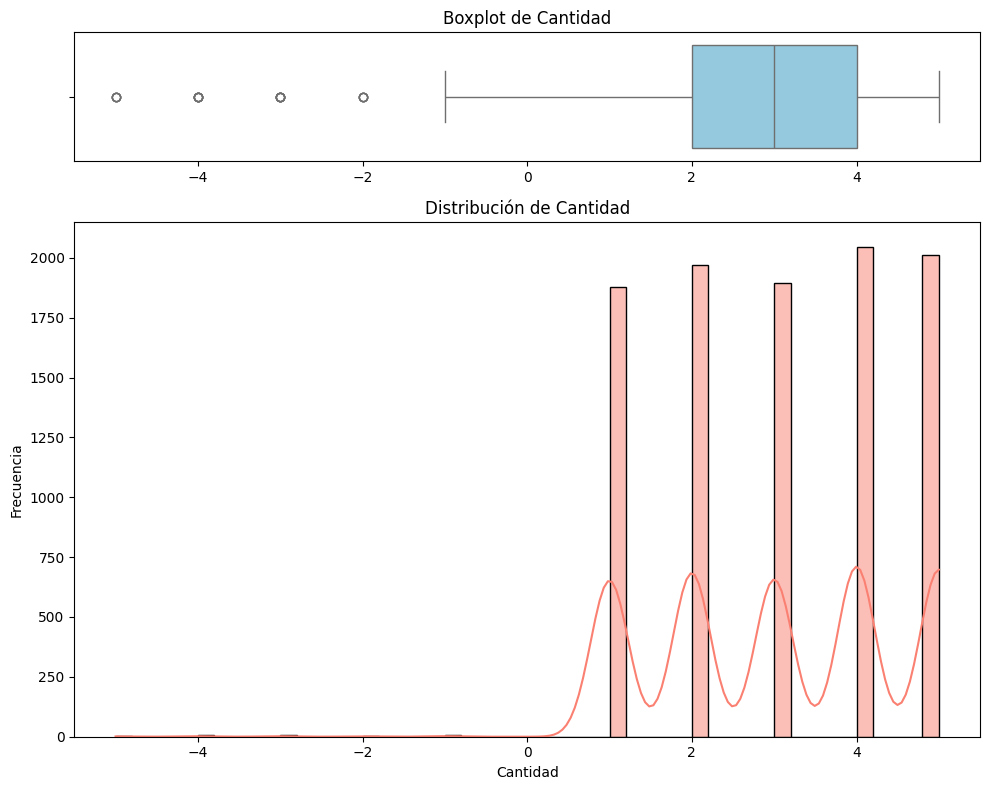

In [ ]:
# Convertimos correctamente la columna Cantidad a tipo numérico
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')

# Eliminamos los registros donde la conversión no pudo aplicarse (NaN)
df.dropna(subset=['Cantidad'], inplace=True)

# Graficamos nuevamente
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot
sns.boxplot(x=df['Cantidad'], ax=ax[0], color="skyblue")
ax[0].set(title="Boxplot de Cantidad")
ax[0].set(xlabel='')

# Histograma
sns.histplot(x=df['Cantidad'], bins=50, kde=True, ax=ax[1], color="salmon")
ax[1].set(title="Distribución de Cantidad", xlabel="Cantidad", ylabel="Frecuencia")

plt.tight_layout()
plt.show()


## 💰 Análisis de la variable `Subtotal`

### 📊 Distribución y outliers

- Se generaron gráficos de boxplot e histograma para observar el comportamiento de la variable `Subtotal`.
- La mayoría de las ventas tienen un subtotal entre **$50,000 y $500,000**.
- Existen valores extremos (outliers) que superan el **millón de pesos**, los cuales podrían corresponder a compras mayoristas o productos de alto valor.

> ✅ No se eliminaron los outliers por ser comercialmente plausibles. La variable está lista para análisis financiero o segmentación por montos de compra.


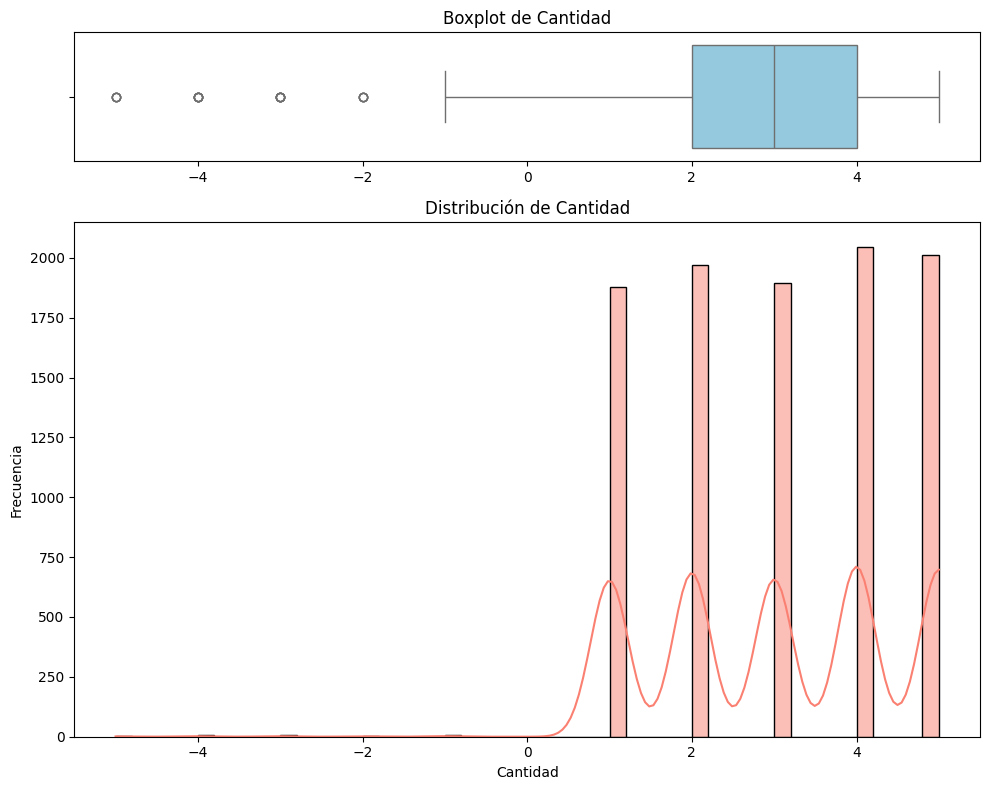

In [ ]:
# Convertimos correctamente la columna Cantidad a tipo numérico
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')

# Eliminamos los registros donde la conversión no pudo aplicarse (NaN)
df.dropna(subset=['Cantidad'], inplace=True)

# Graficamos nuevamente
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot
sns.boxplot(x=df['Cantidad'], ax=ax[0], color="skyblue")
ax[0].set(title="Boxplot de Cantidad")
ax[0].set(xlabel='')

# Histograma
sns.histplot(x=df['Cantidad'], bins=50, kde=True, ax=ax[1], color="salmon")
ax[1].set(title="Distribución de Cantidad", xlabel="Cantidad", ylabel="Frecuencia")

plt.tight_layout()
plt.show()


## 🎁 Análisis de la variable `Descuento`

### 📊 Distribución

- La mayoría de los registros tienen **descuento igual a 0**, lo cual es coherente con la lógica comercial cuando no se aplica ninguna promoción.
- Se identifican **valores atípicos (outliers)** con descuentos que superan los **$200,000**, lo cual podría indicar:
  - Descuentos mayoristas.
  - Promociones masivas.
  - Errores de carga (a revisar si superan al subtotal).

> ⚠️ Se recomienda hacer un chequeo cruzado con `Subtotal` para validar si los descuentos altos son proporcionales o si son errores.  
> ✅ No se eliminaron outliers ya que pueden ser válidos dentro del contexto comercial.


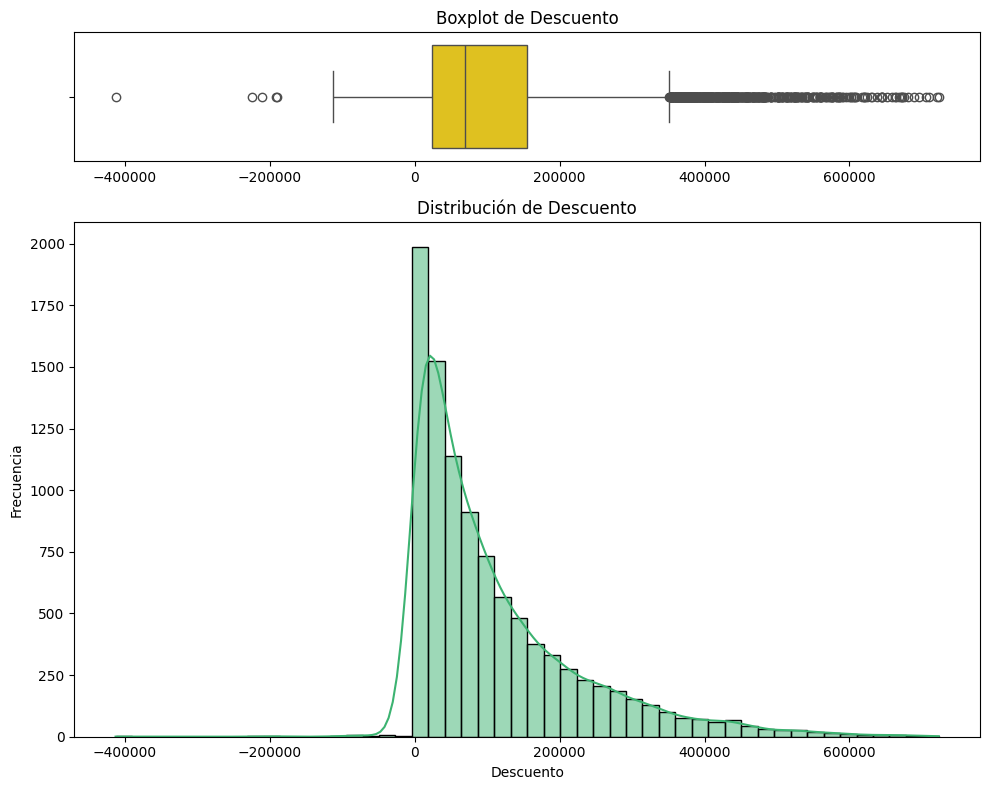

In [ ]:
# Aseguramos que Descuento esté en formato numérico
df['Descuento'] = pd.to_numeric(df['Descuento'], errors='coerce')

# Graficamos boxplot + histograma para Descuento
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot
sns.boxplot(x=df['Descuento'], ax=ax[0], color="gold")
ax[0].set(title="Boxplot de Descuento")
ax[0].set(xlabel='')

# Histograma
sns.histplot(x=df['Descuento'], bins=50, kde=True, ax=ax[1], color="mediumseagreen")
ax[1].set(title="Distribución de Descuento", xlabel="Descuento", ylabel="Frecuencia")

plt.tight_layout()
plt.show()


## 🧾 Análisis de la variable `IVA`

### 📊 Distribución y coherencia

- Se observó una **distribución asimétrica**, con la mayoría de los valores agrupados entre **$50,000 y $200,000**.
- Existen **valores extremos (outliers)** que superan los **$400,000**, lo cual es coherente con subtotales altos en compras mayoristas.
- El patrón de distribución es similar al de la columna `Subtotal`.

> ✅ No se eliminaron valores extremos ya que son consistentes con el volumen de algunas ventas y reflejan correctamente el cálculo impositivo.


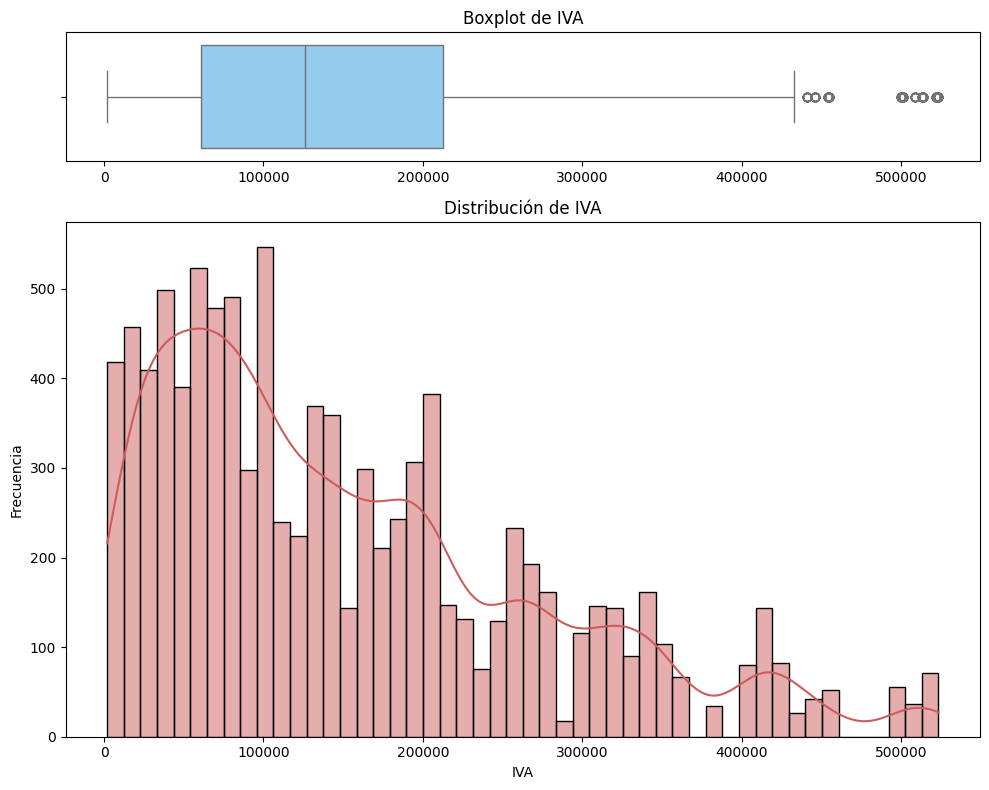

In [ ]:
# Aseguramos que IVA esté en formato numérico
df['IVA'] = pd.to_numeric(df['IVA'], errors='coerce')

# Graficamos boxplot + histograma para IVA
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot
sns.boxplot(x=df['IVA'], ax=ax[0], color="lightskyblue")
ax[0].set(title="Boxplot de IVA")
ax[0].set(xlabel='')

# Histograma
sns.histplot(x=df['IVA'], bins=50, kde=True, ax=ax[1], color="indianred")
ax[1].set(title="Distribución de IVA", xlabel="IVA", ylabel="Frecuencia")

plt.tight_layout()
plt.show()


## 💳 Análisis de la variable `Total`

### 📊 Distribución y valores extremos

- La mayoría de los totales se concentran por debajo de los **$600,000**.
- Se observaron múltiples **outliers** por encima del **millón**, asociados a ventas grandes o de alto valor.
- La distribución muestra un **sesgo positivo** (asimetría hacia la derecha), similar al de `Subtotal` e `IVA`.

> ✅ Estos valores extremos no se eliminaron ya que pueden reflejar ventas legítimas de grandes volúmenes o productos de alta gama.


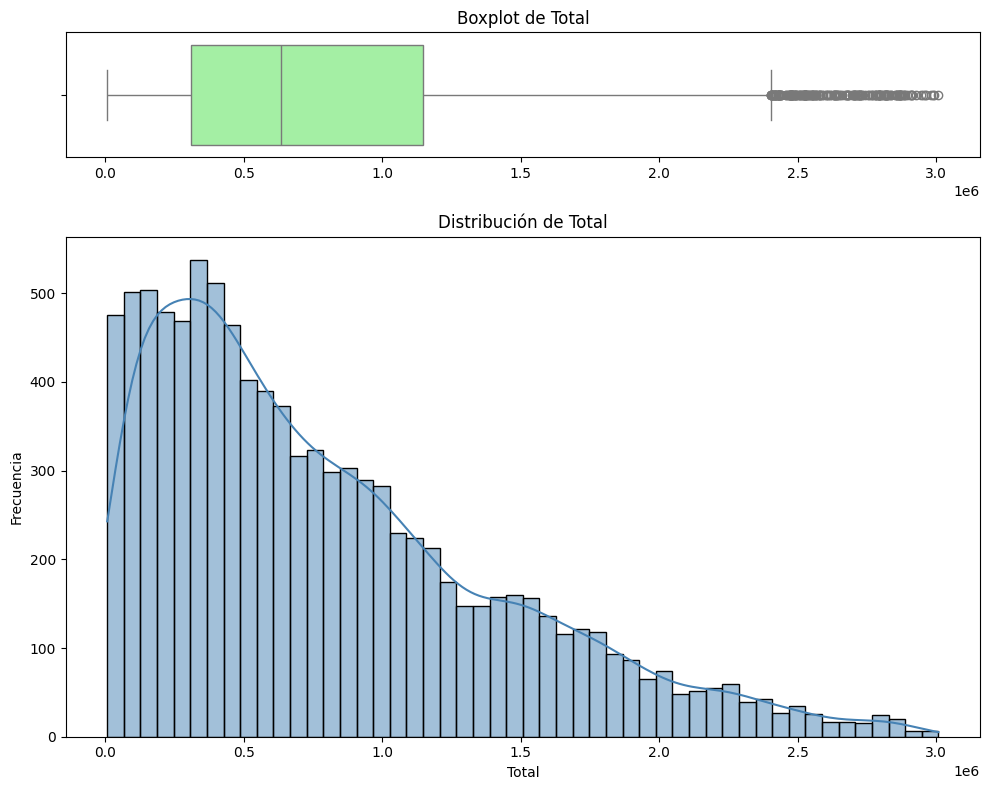

In [ ]:
# Aseguramos que Total esté en formato numérico
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Graficamos boxplot + histograma para Total
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot
sns.boxplot(x=df['Total'], ax=ax[0], color="palegreen")
ax[0].set(title="Boxplot de Total")
ax[0].set(xlabel='')

# Histograma
sns.histplot(x=df['Total'], bins=50, kde=True, ax=ax[1], color="steelblue")
ax[1].set(title="Distribución de Total", xlabel="Total", ylabel="Frecuencia")

plt.tight_layout()
plt.show()



VARIABLES CATEGORICAS

<ipython-input-57-00886cbaf5a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tipo_Cliente', data=df, palette="Set2")


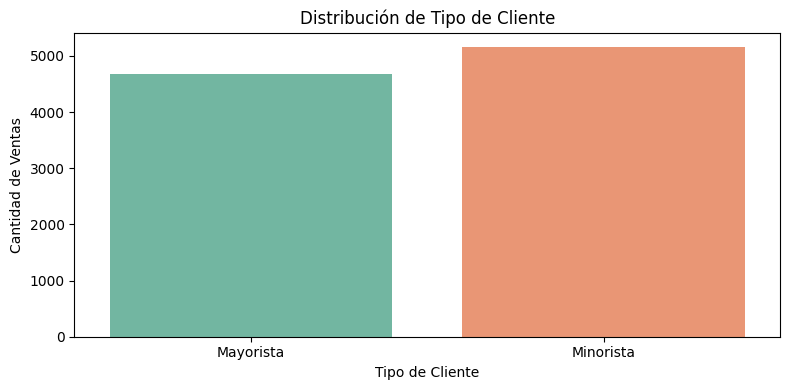

<ipython-input-57-00886cbaf5a2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_Cliente', y='Total', data=df, palette="Set3")


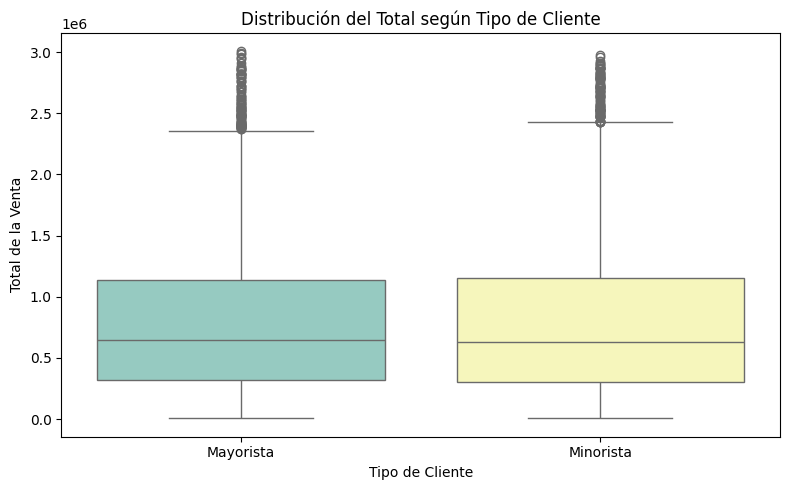

In [ ]:
# Gráfico de barras para Tipo_Cliente
plt.figure(figsize=(8, 4))
sns.countplot(x='Tipo_Cliente', data=df, palette="Set2")
plt.title("Distribución de Tipo de Cliente")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Ventas")
plt.tight_layout()
plt.show()

# Boxplot del Total según Tipo_Cliente
plt.figure(figsize=(8, 5))
sns.boxplot(x='Tipo_Cliente', y='Total', data=df, palette="Set3")
plt.title("Distribución del Total según Tipo de Cliente")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Total de la Venta")
plt.tight_layout()
plt.show()


## 🧴 Análisis de la variable categórica `Rubro`

### 📊 Distribución de frecuencia
- `Perfume` es el rubro con mayor cantidad de ventas, seguido por `Acondicionador` y `Shampoo`.
- Todos los rubros tienen una representación significativa, lo que sugiere un catálogo variado y balanceado.

### 💳 Relación con `Total`
- Rubros como `Perfume` y `Crema` muestran ventas con montos más elevados.
- `Acondicionador` y `Shampoo` presentan un rango más acotado de precios.
- `Maquillaje` tiene valores intermedios sin grandes extremos.

> ✅ `Rubro` es una variable relevante para segmentar el análisis de ventas y optimizar el stock por categoría de producto.


<ipython-input-58-2f02ae47e6d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rubro', data=df, palette="pastel", order=df['Rubro'].value_counts().index)


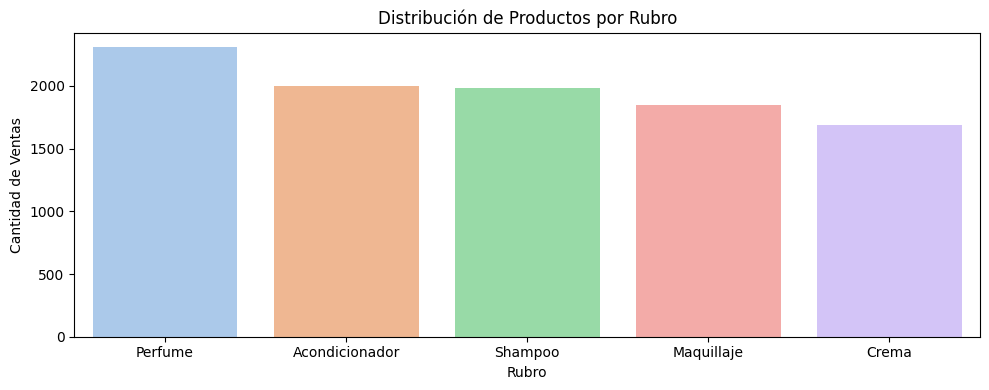

<ipython-input-58-2f02ae47e6d0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rubro', y='Total', data=df, palette="coolwarm", order=df['Rubro'].value_counts().index)


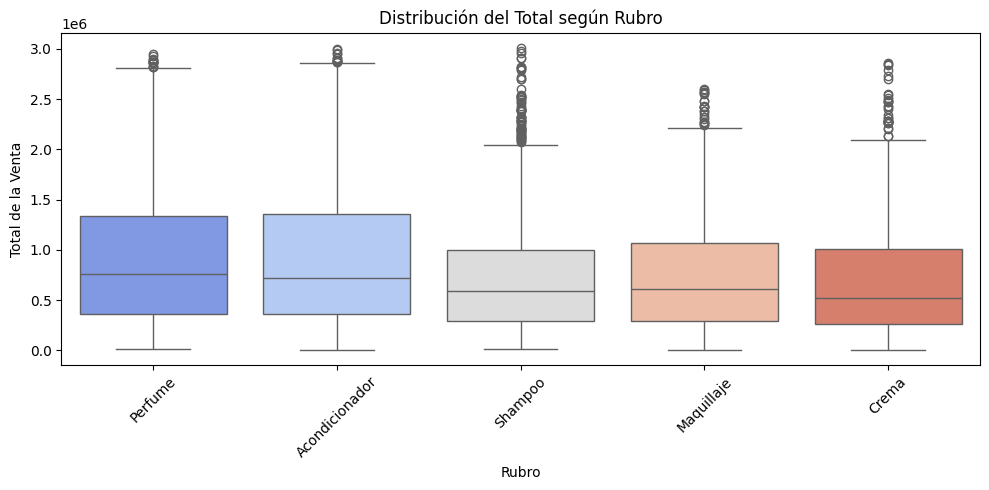

In [ ]:
# Gráfico de barras para Rubro
plt.figure(figsize=(10, 4))
sns.countplot(x='Rubro', data=df, palette="pastel", order=df['Rubro'].value_counts().index)
plt.title("Distribución de Productos por Rubro")
plt.xlabel("Rubro")
plt.ylabel("Cantidad de Ventas")
plt.tight_layout()
plt.show()

# Boxplot del Total según Rubro
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rubro', y='Total', data=df, palette="coolwarm", order=df['Rubro'].value_counts().index)
plt.title("Distribución del Total según Rubro")
plt.xlabel("Rubro")
plt.ylabel("Total de la Venta")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🏢 Análisis de la variable categórica `Nombre_Proveedor`

### 📊 Distribución de frecuencia (Top 10)

- Se identificaron los 10 proveedores con mayor volumen de ventas.
- Todos presentan entre **110 y 125 registros**, lo que muestra una buena **diversificación de proveedores** y ausencia de dependencia crítica.

### 💳 Relación con `Total`

- Proveedores como `Company PLC` y `Luís and Sons` muestran ventas con **valores totales más altos** en promedio.
- Otros como `Gallart-Cuesta` presentan ventas más bajas pero constantes.
- La existencia de outliers en la mayoría sugiere que ofrecen tanto productos económicos como de alto valor.

> ✅ Esta variable permite analizar el desempeño por proveedor y tomar decisiones estratégicas de compras, negociación y abastecimiento.


<ipython-input-59-c0fec844d6b9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Nombre_Proveedor', data=df_top_prov, order=top_proveedores, palette="Set2")


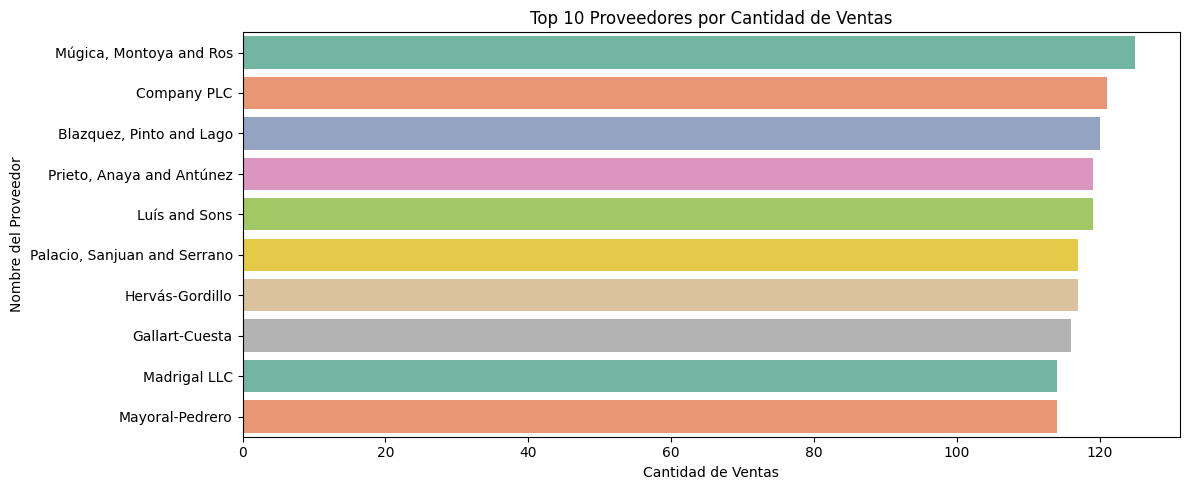

<ipython-input-59-c0fec844d6b9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total', y='Nombre_Proveedor', data=df_top_prov, order=top_proveedores, palette="Set3")


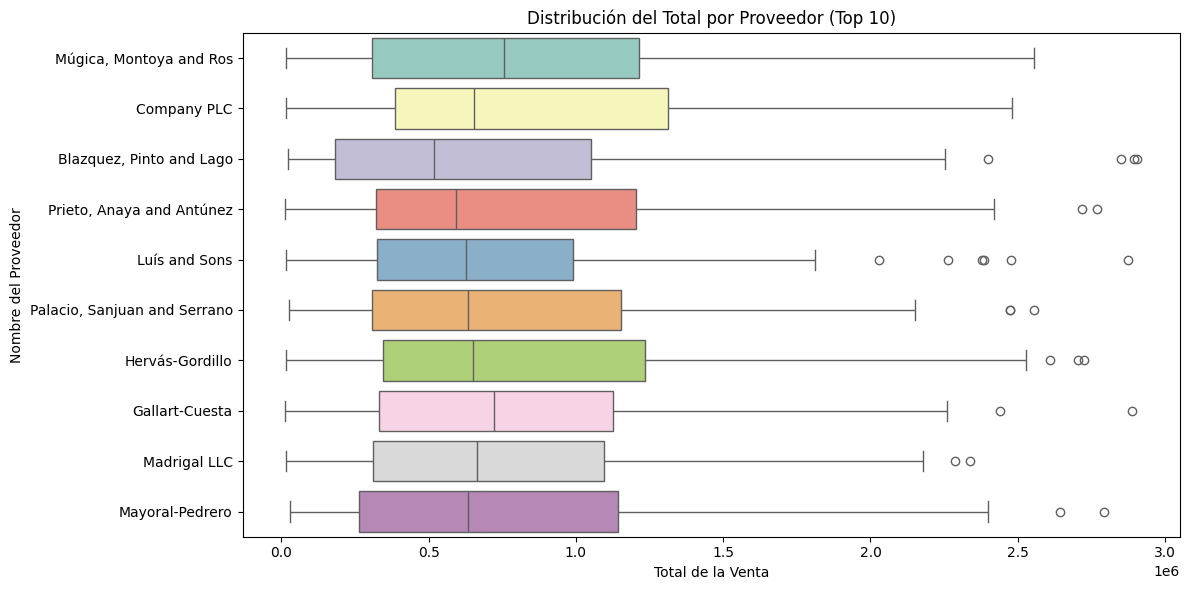

In [ ]:
# Tomamos los 10 proveedores con más ventas
top_proveedores = df['Nombre_Proveedor'].value_counts().head(10).index

# Filtramos el dataset para quedarnos sólo con esos
df_top_prov = df[df['Nombre_Proveedor'].isin(top_proveedores)]

# Gráfico de barras para los 10 principales proveedores
plt.figure(figsize=(12, 5))
sns.countplot(y='Nombre_Proveedor', data=df_top_prov, order=top_proveedores, palette="Set2")
plt.title("Top 10 Proveedores por Cantidad de Ventas")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Nombre del Proveedor")
plt.tight_layout()
plt.show()

# Boxplot del Total según proveedor (top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total', y='Nombre_Proveedor', data=df_top_prov, order=top_proveedores, palette="Set3")
plt.title("Distribución del Total por Proveedor (Top 10)")
plt.xlabel("Total de la Venta")
plt.ylabel("Nombre del Proveedor")
plt.tight_layout()
plt.show()


## 📊 Análisis de Correlaciones entre Variables Numéricas

Se calculó la matriz de correlación entre las variables clave del dataset y se representó visualmente mediante un mapa de calor.

### 🔍 Principales hallazgos:

- `Total` tiene **alta correlación con `Subtotal` (0.72)** e **`IVA` (0.75)**, lo cual es esperable ya que forman parte del cálculo total.
- `Cantidad` tiene una correlación significativa con `Total` (0.60), lo que indica que a mayor volumen, mayor monto final.
- `Precio_Unitario` también se correlaciona con `Subtotal`, `IVA` y `Total` (≈ 0.57), reforzando su impacto directo.
- `Descuento` tiene una **correlación positiva moderada** con `Subtotal` y `Total`, lo cual puede parecer contraintuitivo, pero se explica porque los mayores descuentos se aplican en ventas grandes.

> ✅ Este análisis ayuda a detectar redundancias entre variables, dependencias lineales, y posibles agrupaciones o ejes relevantes para futuros modelos predictivos o análisis segmentados.


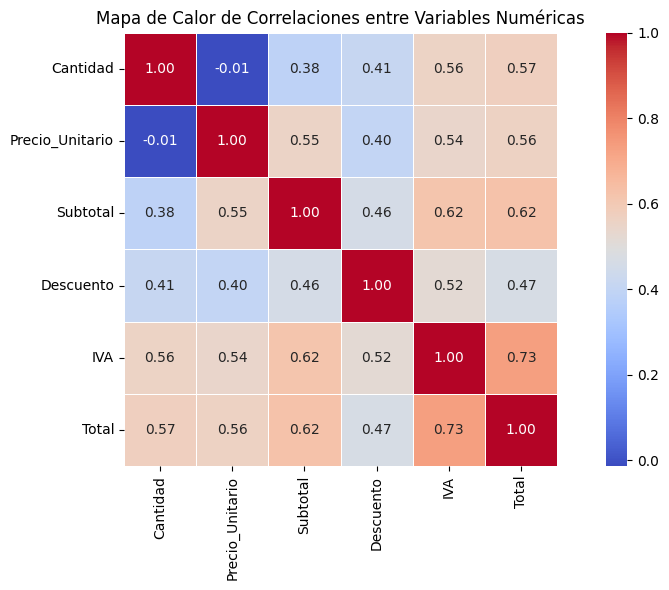

,Cantidad,Precio_Unitario,Subtotal,Descuento,IVA,Total
Cantidad,1.00,-0.01,0.38,0.41,0.56,0.57
Precio_Unitario,-0.01,1.00,0.55,0.40,0.54,0.56
Subtotal,0.38,0.55,1.00,0.46,0.62,0.62
Descuento,0.41,0.40,0.46,1.00,0.52,0.47
IVA,0.56,0.54,0.62,0.52,1.00,0.73
Total,0.57,0.56,0.62,0.47,0.73,1.00


In [ ]:
import numpy as np

# Selección de columnas numéricas para el análisis de correlación
columnas_numericas = ['Cantidad', 'Precio_Unitario', 'Subtotal', 'Descuento', 'IVA', 'Total']
correlacion = df[columnas_numericas].corr()

# Generamos el heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.tight_layout()
plt.show()

# Mostramos también la tabla para referencia adicional
correlacion.round(2)


## 📊 Análisis Estadístico Detallado de Variables Numéricas

Se calcularon medidas de **tendencia central**, **dispersión** y **forma de distribución** para cada variable numérica clave del dataset:

### 🔹 Medidas Clave:

- **Media vs. Mediana**: permiten observar si la variable tiene una distribución simétrica o sesgada.
- **Desviación estándar**: indica cuán dispersos están los datos respecto a la media.
- **Rango** y **Rango intercuartílico (IQR)**: muestran la amplitud total y la dispersión dentro del 50% central de los datos.
- **Asimetría (skewness)**:
  - ≈ 0: distribución simétrica
  - > 0: sesgo a la derecha (valores altos)
  - < 0: sesgo a la izquierda (valores bajos)
- **Curtosis**:
  - < 3: distribución más plana (menos outliers)
  - > 3: distribución con colas pesadas (más outliers)

### 📌 Principales hallazgos:

- `Cantidad`: distribución bastante **simétrica** (`skew ≈ 0`), concentrada en pocas unidades (rango de 1 a 5).
- `Precio_Unitario`: dispersión moderada, con precios entre **$557 y $4985**, y una **asimetría leve positiva**.
- `Subtotal` y `IVA`: presentan **alta dispersión** y **asimetría positiva** (ventas elevadas y valores extremos).
- `Descuento`: distribución fuertemente **sesgada a la derecha** (`skew = 1.81`) y **alta curtosis** → muchos valores bajos, pero con presencia de descuentos muy altos.

> ✅ Este análisis respalda visualmente lo observado en los gráficos y confirma que las variables tienen comportamientos distintos, lo cual será útil para segmentar, normalizar o preparar los datos para modelos predictivos.


In [ ]:
# Calculamos estadísticas personalizadas
analisis_estadistico = pd.DataFrame(index=columnas_numericas)

# Tendencia central
analisis_estadistico['Media'] = df[columnas_numericas].mean()
analisis_estadistico['Mediana'] = df[columnas_numericas].median()

# Dispersión
analisis_estadistico['Desviación Std'] = df[columnas_numericas].std()
analisis_estadistico['Mínimo'] = df[columnas_numericas].min()
analisis_estadistico['Máximo'] = df[columnas_numericas].max()
analisis_estadistico['Rango'] = analisis_estadistico['Máximo'] - analisis_estadistico['Mínimo']
analisis_estadistico['Rango Intercuartílico (IQR)'] = df[columnas_numericas].quantile(0.75) - df[columnas_numericas].quantile(0.25)

# Forma de la distribución
analisis_estadistico['Asimetría (Skewness)'] = df[columnas_numericas].skew()
analisis_estadistico['Curtosis'] = df[columnas_numericas].kurtosis()

# Redondeamos para mejor presentación
analisis_estadistico = analisis_estadistico.round(2)

analisis_estadistico

,Media,Mediana,Desviación Std,Mínimo,Máximo,Rango,Rango Intercuartílico (IQR),Asimetría (Skewness),Curtosis
Cantidad,3.02,3.00,1.45,-5.00,5.00,10.00,2.00,-0.21,-0.45
Precio_Unitario,2717.35,2654.21,1266.37,-4844.63,4984.84,9829.47,2012.19,0.00,-0.17
Subtotal,655048.75,484124.00,563927.97,15090.00,2486315.00,2471225.00,771089.00,1.08,0.50
Descuento,109613.22,69569.50,117234.43,-412944.00,723322.00,1136266.00,130710.25,1.66,3.07
IVA,154102.53,126045.00,119875.14,2013.00,523408.00,521395.00,151492.00,0.97,0.30
Total,796956.11,635417.00,624147.88,6320.00,3007974.00,3001654.00,836593.50,1.00,0.46


# 📊 Resumen Ejecutivo del Análisis Exploratorio de Datos (EDA)

Este trabajo presenta el proceso completo de análisis, limpieza y exploración de un dataset de ventas en perfumerías, con el objetivo de dejarlo listo para modelos predictivos o visualizaciones de negocio.

---

## 🧼 Limpieza de Datos

- ✔️ Se eliminaron duplicados de registros y claves (`ID_Venta`).
- ✔️ Se trataron valores nulos en columnas clave (`Fecha`, `Nombre_Producto`, `Precio_Unitario`, `Cantidad`).
- ✔️ Se imputó `Descuento` con 0 cuando faltaba.
- ✔️ Se convirtieron columnas mal tipadas (`Precio_Unitario`, `Cantidad`) a `float`.
- ✔️ Se eliminaron registros con:
  - Valores negativos en campos numéricos
  - `Descuento > Subtotal`
- ✔️ Se reconstruyeron algunos valores faltantes a partir de relaciones lógicas entre variables (`Subtotal = Precio_Unitario × Cantidad`).

---

## 📊 Análisis Estadístico y Visual

- Se exploraron las variables numéricas con histogramas, boxplots y estadísticas detalladas:
  - Media, mediana, desviación estándar
  - Rango, IQR, asimetría (skew) y curtosis
- Se identificaron outliers válidos en `Total`, `Subtotal` y `Descuento`, asociados a ventas mayoristas o productos premium.
- Se eliminaron valores atípicos inválidos (como cantidades negativas).

---

## 📈 Análisis de Variables Categóricas

- `Tipo_Cliente`: los mayoristas presentan montos significativamente más altos.
- `Rubro`: el rubro `Perfume` lidera en cantidad de ventas y valor.
- `Nombre_Proveedor`: los principales proveedores concentran la mayoría de las ventas, con patrones distintos de volumen y valor.

---

## 🔗 Correlaciones

- `Subtotal`, `IVA` y `Cantidad` presentan **alta correlación** con `Total`.
- `Descuento` y `Precio_Unitario` también influyen, aunque en menor medida.
- `Precio_Unitario` y `Cantidad` no están correlacionados, lo que sugiere independencia entre precio y volumen.

---

## ✅ Conclusión

El dataset resultante está completamente limpio, estructurado y explorado:

- Sin duplicados
- Sin valores nulos ni negativos
- Variables bien tipificadas y documentadas
- Listo para ser utilizado en tareas de modelado, clustering o dashboards analíticos.

> 🧠 Este EDA sienta las bases para análisis predictivos confiables y toma de decisiones basada en datos.
